# Quantum Spectral Graph Analysis - Whitepaper #2

# Initial Experimentation and Results

Ohad Lev, September 2025

---------

## (0) Imports

In [1]:
import warnings
from itertools import combinations

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Math

from qiskit.quantum_info import SparsePauliOp, Pauli
from qiskit.visualization import array_to_latex

from qsga.data_verifiers import is_valid_laplacian, detect_array_duplications
from qsga.graphics import obtain_math_text_hermitian_spectrum
from qsga.util import decompose_laplacian_matrix, transform_laplacian_to_graph

In [2]:
warnings.filterwarnings("ignore")

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble": r"\usepackage{amsmath}",
})

-----------

##  (1) Looking into simple, toy cases

### A close look into the $n = 2$ case

For $n = 2$, the $\mathcal{IX}_n$ set is:

$$
    \mathcal{IX}_2 = \{II, IX, XI, XX\} \\
    \tag{1}
$$

So according to the method proposed in Whitepaper $\#1$, there are $7$ (unweighted, undirected) regular graphs that can be generated:

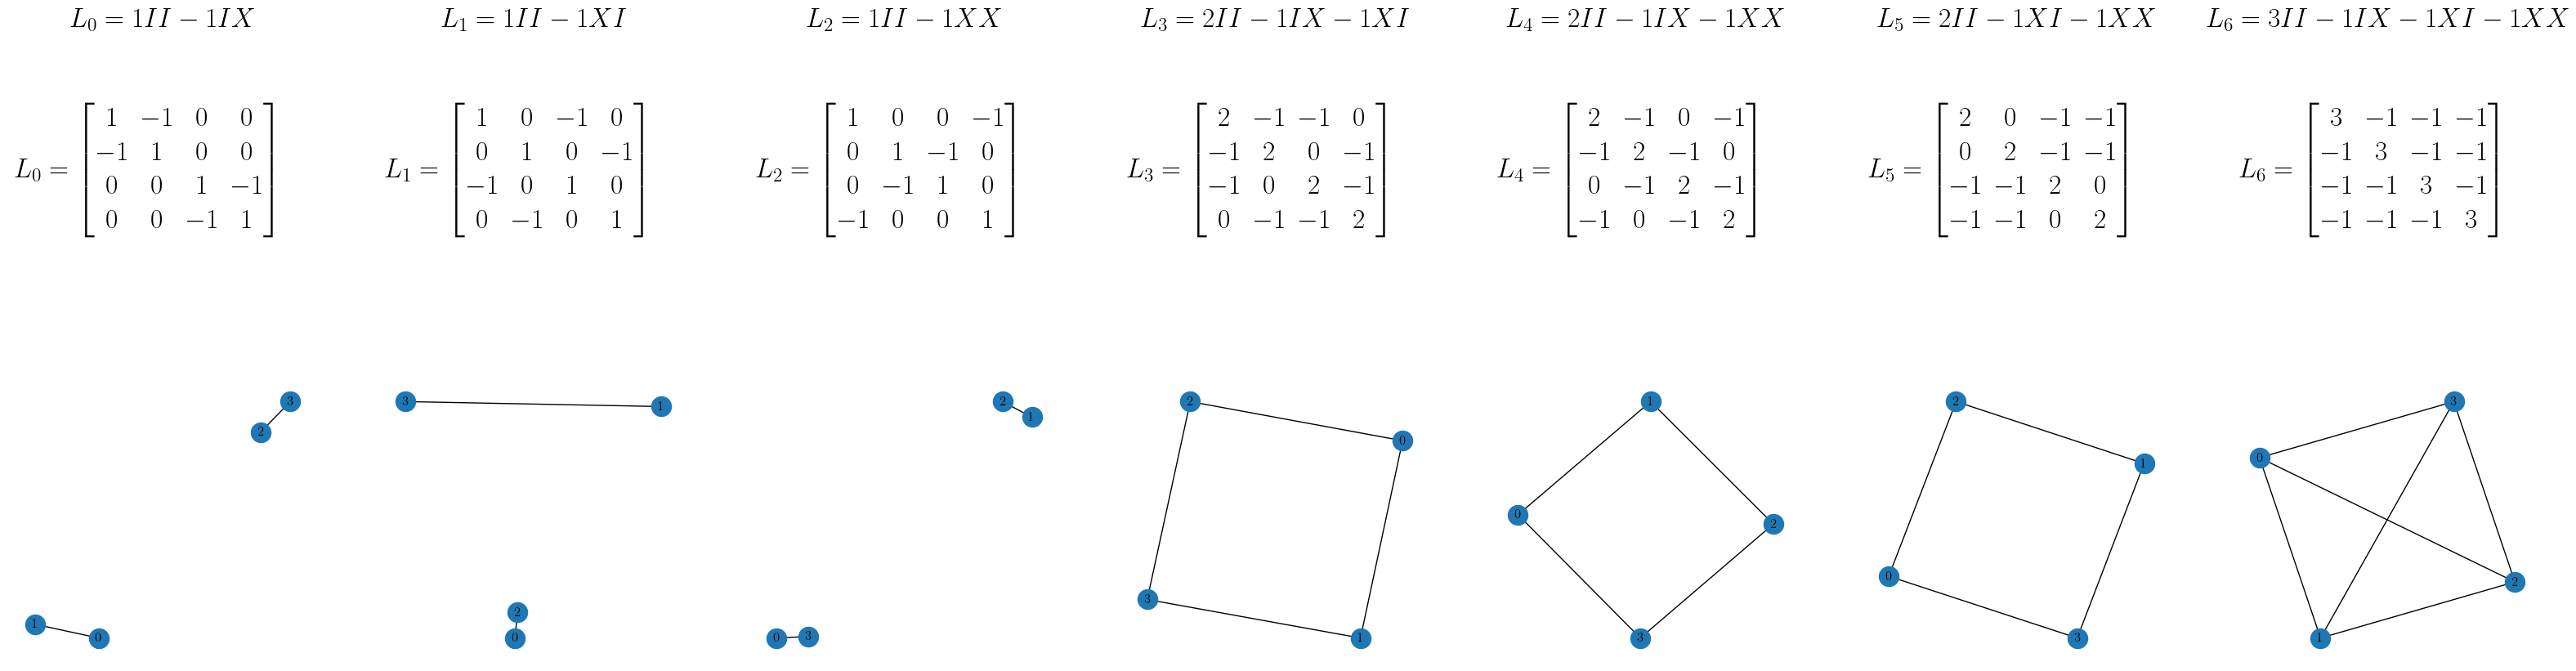

In [3]:
IX_2 = ["IX", "XI", "XX"] # Excluding II
combinations_IX_2 = [
    (("II", "IX"), (1, -1)),
    (("II", "XI"), (1, -1)),
    (("II", "XX"), (1, -1)),
    (("II", "IX", "XI"), (2, -1, -1)),
    (("II", "IX", "XX"), (2, -1, -1)),
    (("II", "XI", "XX"), (2, -1, -1)),
    (("II", "IX", "XI", "XX"), (3, -1, -1, -1)),
]
num_options = len(combinations_IX_2)

fig, axes = plt.subplots(2, num_options, figsize=(40, 10))

ix2_dense_laplacians = []
for index, combination in enumerate(combinations_IX_2):
    L_sparse = SparsePauliOp(data=combination[0], coeffs=combination[1])
    L_dense = L_sparse.to_matrix().astype(np.float64)
    
    ix2_dense_laplacians.append(L_dense)
    
    L_latex_text = array_to_latex(L_dense, source=True).replace("\n", "")
    L_latex_text = (
        r"$"
        f"L_{index} = {L_latex_text}"
        r"$"
    )
    
    title = f"$L_{index} = " + "".join([f"{int(x[1].real)}{x[0]}" for x in L_sparse.label_iter()]) + "$"
    axes[0, index].set_title(title, fontsize=24)
    
    axes[0, index].axis("off")
    axes[0, index].text(0.02, 0.5, L_latex_text, fontsize=24)
    
    diagonal, D, A = decompose_laplacian_matrix(L_dense)
    graph = nx.from_numpy_array(A)
    nx.draw(graph, with_labels=True, ax=axes[1, index])

We verify that indeed all graphs are unique (can be isomorphic, but not identical):

In [4]:
detect_array_duplications(ix2_dense_laplacians)

set()

### A close look into the $n = 3$ case for $d = 3$

$$
    \mathcal{IX}_3 = \{III, IIX, IXI, IXX, XII, XIX, XXI, XXX \}
    \tag{2}
$$

According to the generation method, for the set $\mathcal{IX}_3$ there are $2 ^ {|\mathcal{IX}_3| - 1} = 127$ different graphs that we can generate, with $1 \leq d \leq 7, d \in \mathbb{N}$. That's too much to look at, so we consider here the case of $d = 3$, where the number of generated graphs is ${{7}\choose{3}} = 35$.

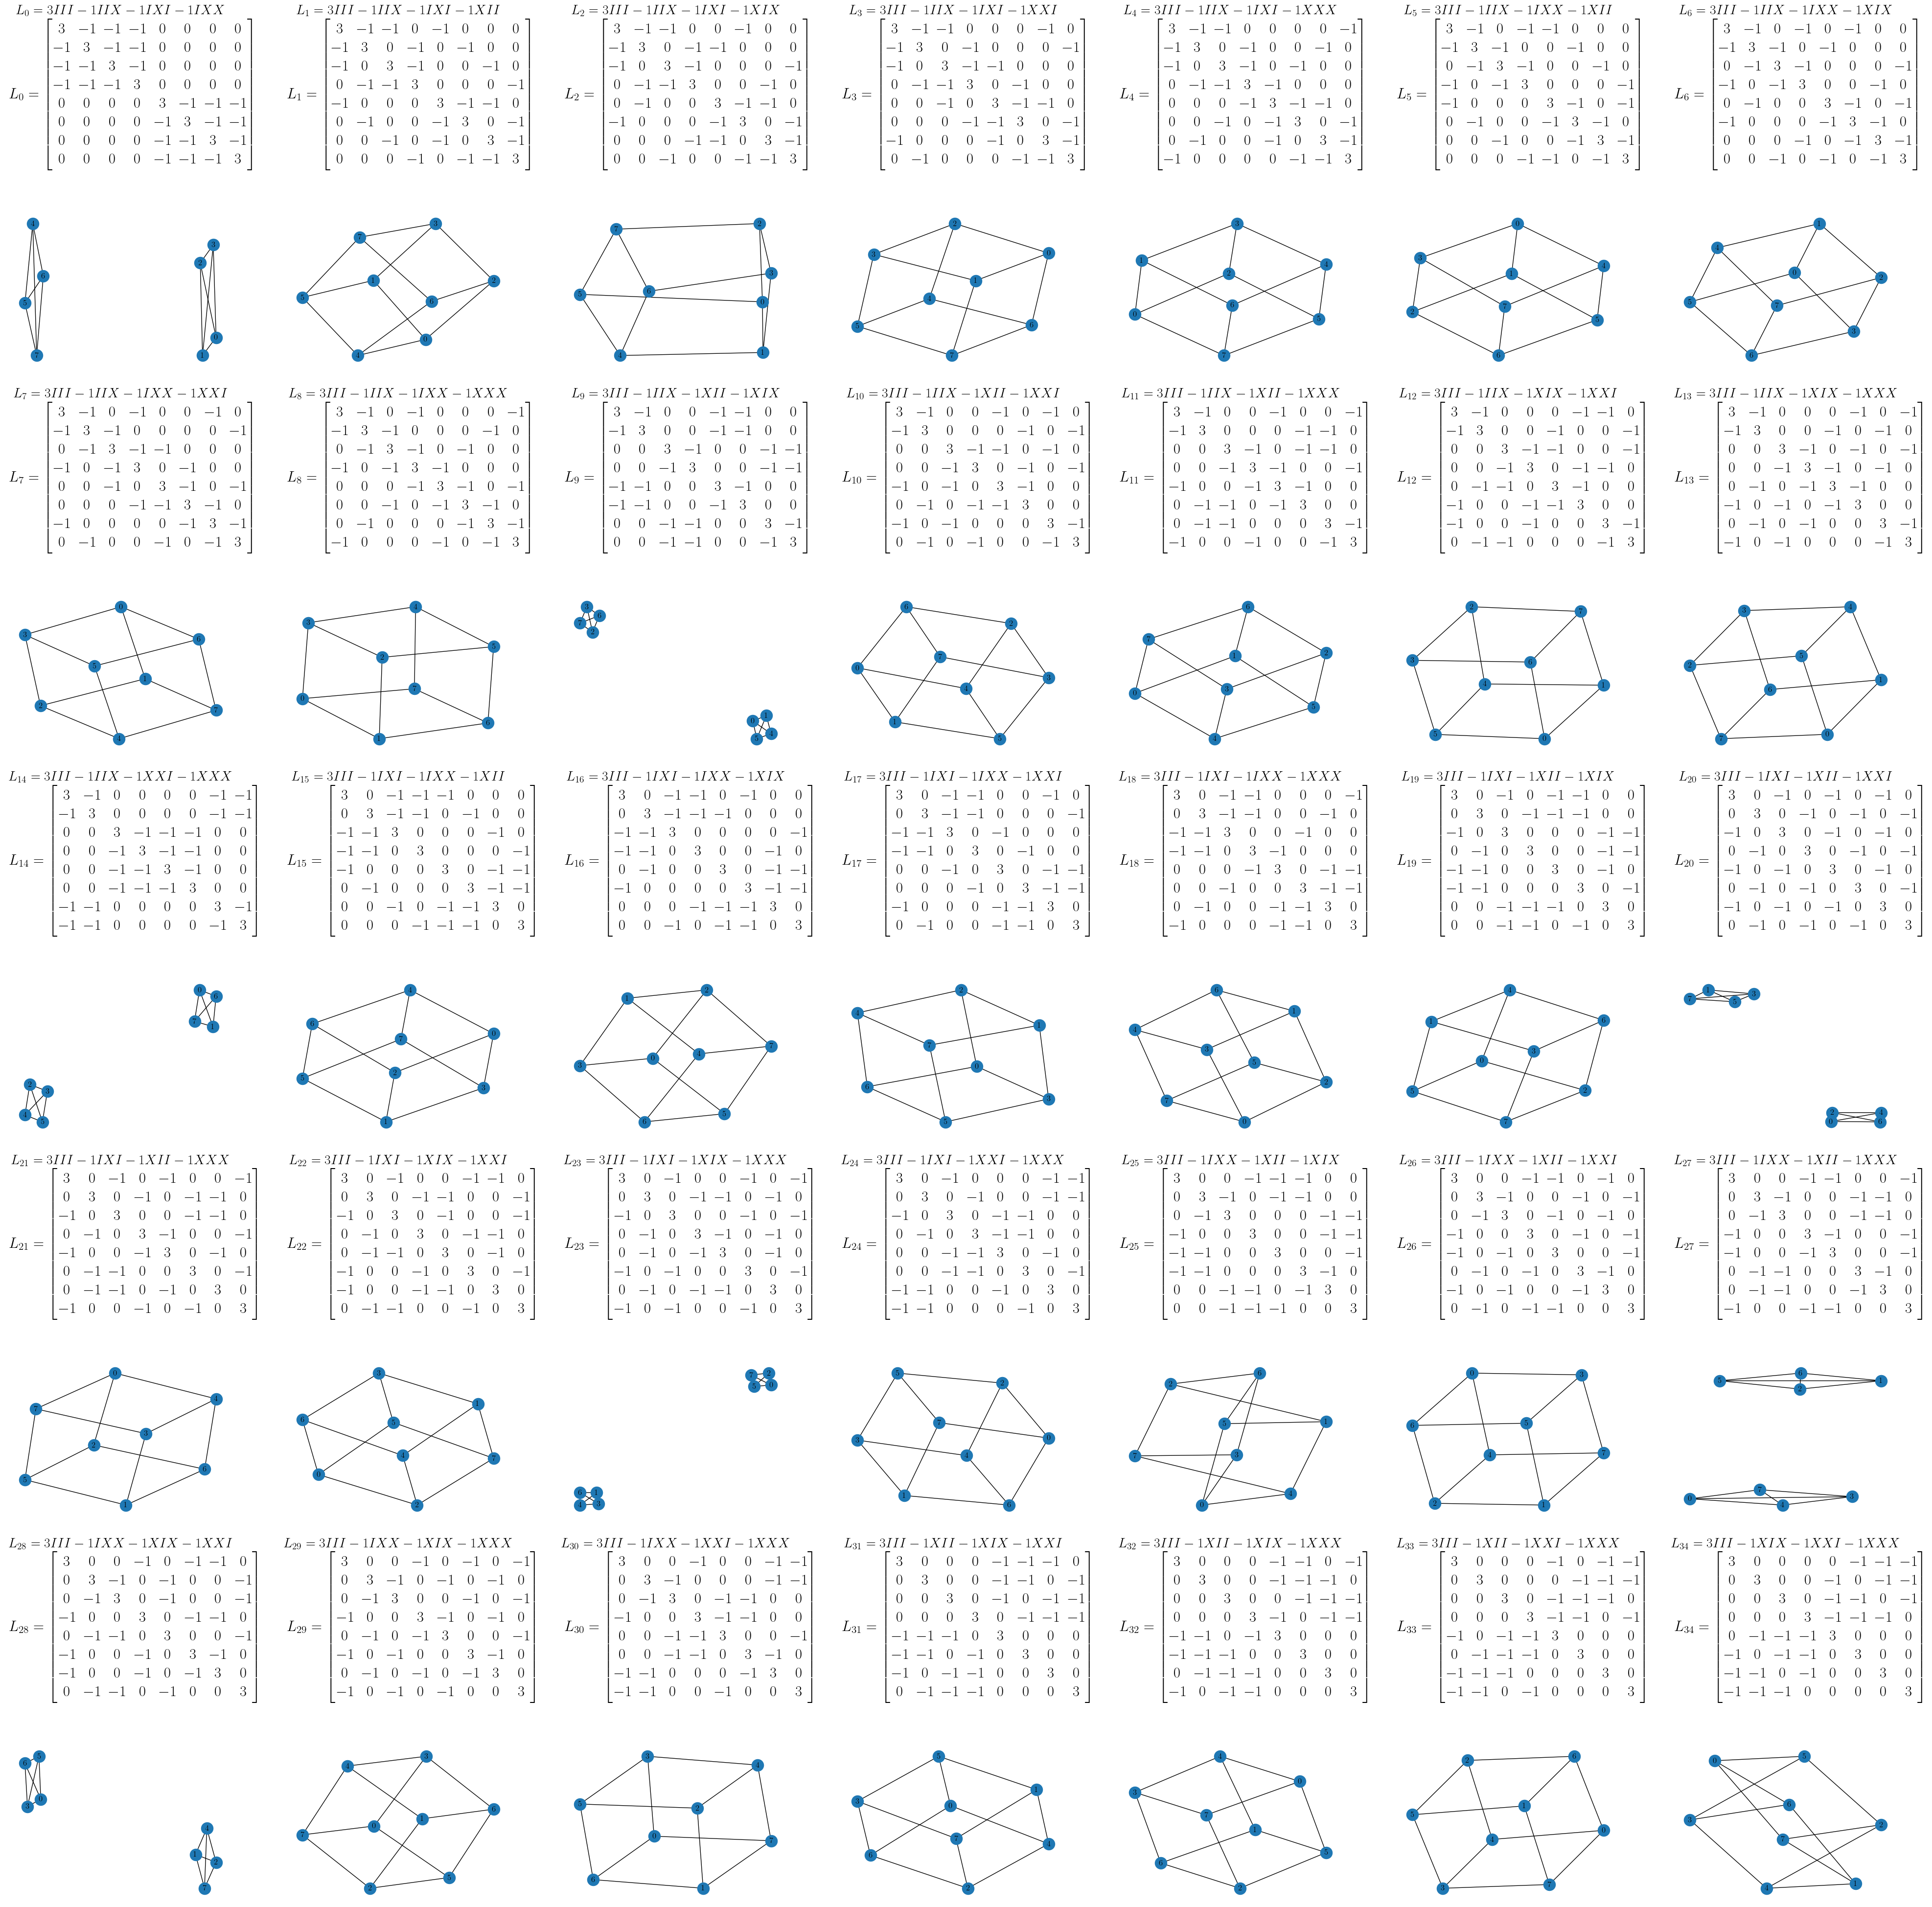

In [5]:
d = 3
IX_3 = ["IIX", "IXI", "IXX", "XII", "XIX", "XXI", "XXX"] # Excluding III
combinations_IX3_d3 = [
    (("III",) + c, (d, -1, -1, -1)) for c in combinations(IX_3, d)
]
num_combinations_IX3_d3 = len(combinations_IX3_d3)

num_cols = 7
num_double_rows = 5
num_rows = num_double_rows * 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 50))

dense_IX3_laplacians = []
for index, combination in enumerate(combinations_IX3_d3):
    
    col_index = index % num_cols
    double_row_index = (index // num_cols) * 2
    
    latex_index_string = "{" + f"{index}" + "}"
    
    L_sparse = SparsePauliOp(data=combination[0], coeffs=combination[1])
    L_dense = L_sparse.to_matrix().astype(np.float64)
    dense_IX3_laplacians.append(L_dense)
    
    L_latex_text = array_to_latex(L_dense, source=True).replace("\n", "")
    L_latex_text = (
        r"$"
        f"L_{latex_index_string} = {L_latex_text}"
        r"$"
    )
    
    title = f"$L_{latex_index_string} = " + "".join([f"{int(x[1].real)}{x[0]}" for x in L_sparse.label_iter()]) + "$"
    axes[double_row_index, col_index].set_title(title, fontsize=20)
    
    axes[double_row_index, col_index].axis("off")
    axes[double_row_index, col_index].text(0.02, 0.5, L_latex_text, fontsize=22)
    
    diagonal, D, A = decompose_laplacian_matrix(L_dense)
    graph = nx.from_numpy_array(A)
    nx.draw(graph, with_labels=True, ax=axes[double_row_index + 1, col_index])

We verify that indeed all graphs are unique:

In [6]:
detect_array_duplications(dense_IX3_laplacians)

set()

We can easily see above that many graphs are isomorphic to each other, but their underlying Laplacian matrices are different and therefore they are not identical.

### The case of $n = 3, d = 2$ demonstrates well that Method #1 can't express all $d$-regular graphs of size $n$

It can easily seen that the ring graph is not generated by Method #1, with $n = 3, d = 2$:

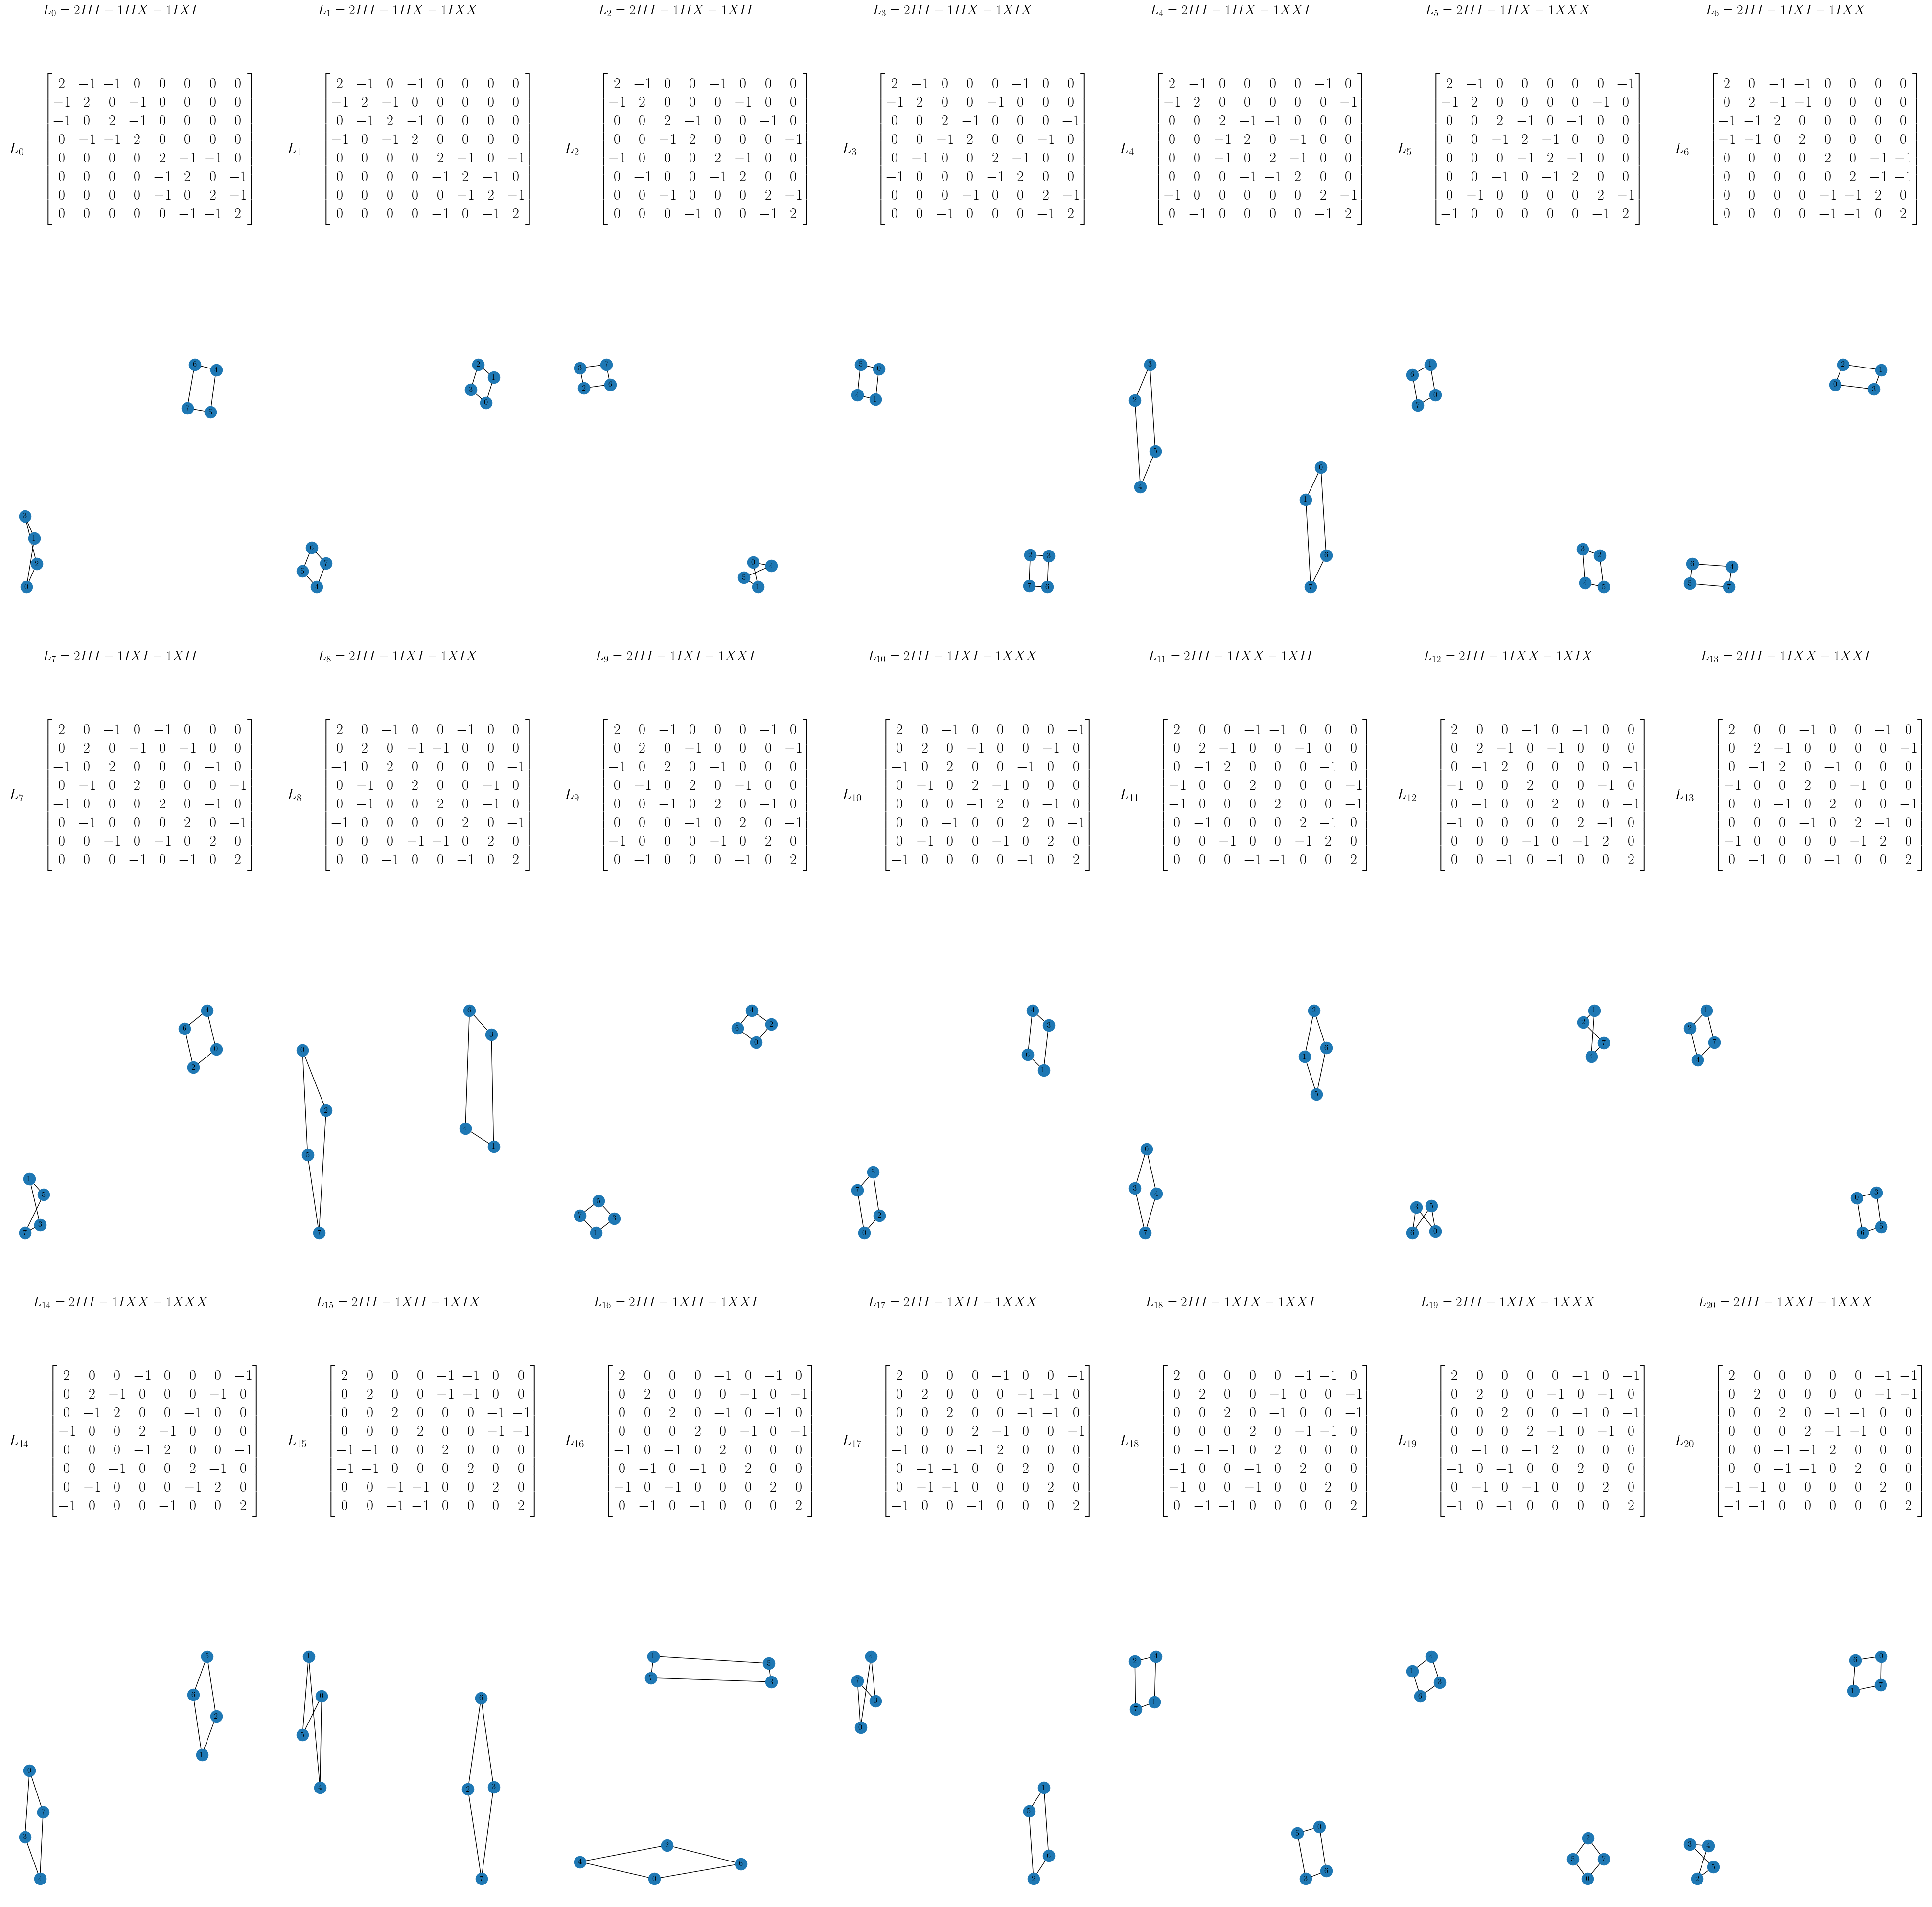

In [7]:
d = 2
combinations_IX3_d2 = [
    (("III",) + c, (d, -1, -1)) for c in combinations(IX_3, d)
]
num_combinations_IX3_d2 = len(combinations_IX3_d2)

num_cols = 7
num_double_rows = 3
num_rows = num_double_rows * 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 50))

dense_IX3d2_laplacians = []
for index, combination in enumerate(combinations_IX3_d2):
    
    col_index = index % num_cols
    double_row_index = (index // num_cols) * 2
    
    latex_index_string = "{" + f"{index}" + "}"
    
    L_sparse = SparsePauliOp(data=combination[0], coeffs=combination[1])
    L_dense = L_sparse.to_matrix().astype(np.float64)
    dense_IX3d2_laplacians.append(L_dense)
    
    L_latex_text = array_to_latex(L_dense, source=True).replace("\n", "")
    L_latex_text = (
        r"$"
        f"L_{latex_index_string} = {L_latex_text}"
        r"$"
    )
    
    title = f"$L_{latex_index_string} = " + "".join([f"{int(x[1].real)}{x[0]}" for x in L_sparse.label_iter()]) + "$"
    axes[double_row_index, col_index].set_title(title, fontsize=20)
    
    axes[double_row_index, col_index].axis("off")
    axes[double_row_index, col_index].text(0.02, 0.5, L_latex_text, fontsize=22)
    
    diagonal, D, A = decompose_laplacian_matrix(L_dense)
    graph = nx.from_numpy_array(A)
    nx.draw(graph, with_labels=True, ax=axes[double_row_index + 1, col_index])

------

## (2) Generalization of the Laplacian generation method

Consider the following outer-product expressions, which form a basis for all $2 \times 2$ matrices:

$$
    |0\rangle\langle0| = \frac{1}{2}(I + Z) \ \ \ \ \ \ \ 
    |0\rangle\langle1| = \frac{1}{2}(X + iY) \\
    |1\rangle\langle0| = \frac{1}{2}(X - iY) \ \ \ \ \ \ \ 
    |1\rangle\langle1| = \frac{1}{2}(I - Z)
    \tag{3}
$$

It allows us to set the value of any entry in the matrix of interest using the Pauli basis. However, we should carefully notice that the cost in general is exponential in $n$. For example:

$$
    |00\rangle \langle 00| =
    |0\rangle \langle 0| \otimes |0\rangle \langle 0| = 
    \frac{1}{2}(I + Z) \otimes \frac{1}{2}(I + Z) = 
    \frac{1}{4}(II + IZ + ZI + ZZ)
    \tag{4}
$$

What we can do, is to use some small, local manifestation of one of the above operators, and scale it with the identity (or also with other operators?) as much as we want, for example:

$$
    II \otimes |00\rangle \langle 00 | = \frac{1}{4}(IIII + IIIZ + IIZI + IIZZ)
    \tag{5}
$$

In [8]:
II00 = SparsePauliOp(
    data=["IIII", "IIIZ", "IIZI", "IIZZ"],
    coeffs=[0.25 for _ in range(4)]
).to_matrix()

array_to_latex(
    II00,
    prefix=r"II \otimes |00\rangle \langle 00 | = \tag{6}",
    max_size=16
)

<IPython.core.display.Latex object>

This technique allows us to "ruin" the symmetry of the highly structured graphs we generate with the $\mathcal{IX}_n$ method, hopefully with non-exponential cost. We demonstrate that with $L_1$ generated above with the setting $n = 3, d = 3$:

In [9]:
L1 = dense_IX3_laplacians[1]
array_to_latex(L1, prefix=r"L_1 = \tag{7}")

<IPython.core.display.Latex object>

In [10]:
op_00 = SparsePauliOp(data=["II", "IZ", "ZI", "ZZ"], coeffs=[0.25 for _ in range(4)]).to_matrix()
I = np.eye(2)
I00 = np.kron(I, op_00)
array_to_latex(I00, prefix=r"I \otimes |00\rangle\langle00| = \tag{8}")

<IPython.core.display.Latex object>

In [11]:
op_01 = SparsePauliOp(data=["XX", "XY", "YX", "YY"], coeffs=[0.25, 0.25j, 0.25j, -0.25]).to_matrix()
I01 = np.kron(I, op_01)
array_to_latex(I01, prefix=r"I \otimes |01\rangle\langle01| = \tag{9}")

<IPython.core.display.Latex object>

In [12]:
op_10 = SparsePauliOp(data=["XX", "XY", "YX", "YY"], coeffs=[0.25, -0.25j, -0.25j, -0.25]).to_matrix()
I10 = np.kron(I, op_10)
array_to_latex(I10, prefix=r"I \otimes |10\rangle\langle10| = \tag{10}")

<IPython.core.display.Latex object>

In [13]:
op_11 = SparsePauliOp(data=["II", "IZ", "ZI", "ZZ"], coeffs=[0.25, -0.25, -0.25, 0.25]).to_matrix()
I11 = np.kron(I, op_11)
array_to_latex(I11, prefix=r"I \otimes |11\rangle\langle11| = \tag{11}")

<IPython.core.display.Latex object>

In [14]:
X = np.array(
    [
        [0, 1],
        [1, 0]
    ]
)

X00 = np.kron(X, op_00)
X01 = np.kron(X, op_01)
X10 = np.kron(X, op_10)
X11 = np.kron(X, op_11)

L1prime = L1 + I00 + X11 - X01 - X10

array_to_latex(
    L1prime,
    prefix=(
        r"L_1' = L_1 + I \otimes |00\rangle\langle00| + X \otimes \big("
        r"|11\rangle\langle11| - |01\rangle\langle01| - |10\rangle\langle10|"
        r"\big) = \tag{12}"
    )
)

<IPython.core.display.Latex object>

It can be seen that the we broke the regularity of $L_1$ in the construction of $L_1'$. We draw the graphs:

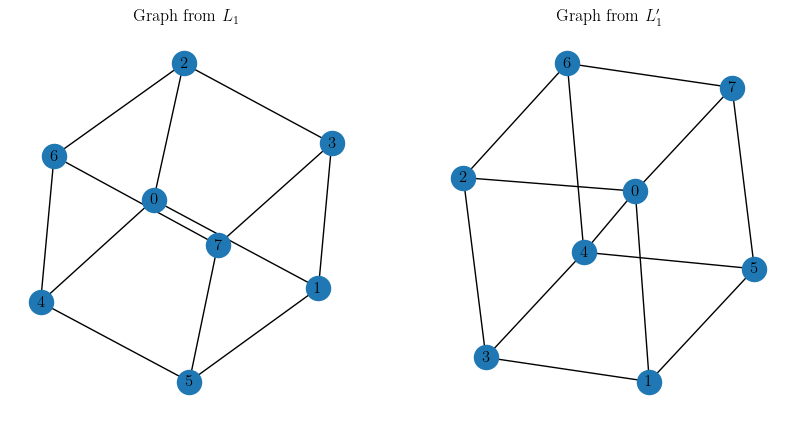

In [15]:
graph_L1 = transform_laplacian_to_graph(L1)
graph_L1prime = transform_laplacian_to_graph(L1prime)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

nx.draw(graph_L1, with_labels=True, ax=axes[0])
axes[0].set_title("Graph from $L_1$")

nx.draw(graph_L1prime, with_labels=True, ax=axes[1])
axes[1].set_title("Graph from $L_1'$")

plt.show()

And we also take a look at the eigenspectrum:

In [16]:
eigvals, eigvecs = np.linalg.eigh(L1prime)

latex_text = ""
last_eigval = None

print("The spectrum of L1':")
for index, eigval in enumerate(eigvals):
    index_string = "{" + f"{index + 1}" + "}"
    rounded_eigval = round(eigval, 10)
    text = fr"\lambda_{index_string} = {rounded_eigval}, \ "
    
    if rounded_eigval == last_eigval or last_eigval is None:
        latex_text += text
    else:
        display(Math(latex_text[:-4]))
        latex_text = text
        
    if index == len(eigvals) - 1:
        display(Math(latex_text[:-4]))
        
    last_eigval = rounded_eigval

The spectrum of L1':


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------

## (3) The ring graph

We take a quick look at the ring graph with $|\mathcal{V}| = 8$ nodes:

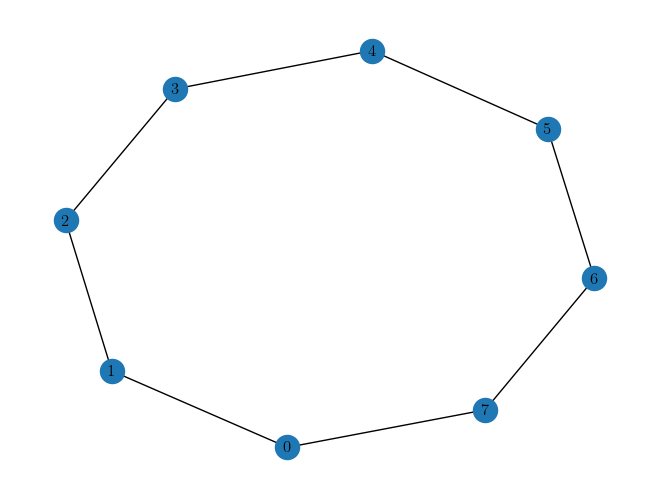

In [17]:
ring_graph = nx.cycle_graph(8)
nx.draw(ring_graph, with_labels=True)

Its Laplacian matrix:

In [18]:
L_ring8_dense = nx.laplacian_matrix(ring_graph).todense()
array_to_latex(L_ring8_dense, prefix="L_{\\text{RING}_8} = \\tag{13}")

<IPython.core.display.Latex object>

A Pauli decomposition for the Laplacian:

In [19]:
L_ring8_sparsepauli = SparsePauliOp.from_operator(L_ring8_dense)

mathtext = r"L_{\text{RING}_8} = "
for index, (string, weight) in enumerate(L_ring8_sparsepauli.label_iter()):
    weight = weight.real
    if weight >= 0 and index != 0:
        weight = f" + {weight}"
    mathtext += f"{weight}{string}"
mathtext += r" \tag{14}"

Math(mathtext)

<IPython.core.display.Math object>

The spectrum of the Laplacian:

In [20]:
display(
    Math(obtain_math_text_hermitian_spectrum(np.linalg.eigh(L_ring8_dense)))
)

<IPython.core.display.Math object>

---------

## Versions

In [21]:
from sys import version as python_version

print(f"{python_version=}")

python_version='3.12.3 (main, Jan 22 2026, 20:57:42) [GCC 13.3.0]'


In [22]:
pip freeze | grep -E "^(numpy|networkx|ipython|qiskit|jupyter|notebook|traitlets)=="

ipython==8.11.0
jupyter==1.1.1
networkx==3.5
notebook==6.4.8
numpy==1.26.4
qiskit==2.1.1
traitlets==5.9.0
Note: you may need to restart the kernel to use updated packages.
